<a href="https://colab.research.google.com/github/EnayathShaik/AI_ML/blob/Practice/social_network_ads_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.shape

(400, 5)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.drop(['User ID'], inplace = True, axis=1 )
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB


In [7]:
df.isnull().sum()

,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [8]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int64  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]
print(x.shape)
print(y.shape)

(400, 3)
(400,)


In [12]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0
2,0,26.0,43000.0
3,0,27.0,57000.0
4,1,19.0,76000.0


In [13]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= .2, random_state= 42, stratify=y) #stratify maintains the ratio of 0s, 1s in training and test data set
print (x_train.shape)
print (y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 3)
(320,)
(80, 3)
(80,)


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras import Sequential

In [17]:
model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim = 3))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train , epochs= 100, validation_data= (x_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6160 - loss: 3409.5063 - val_accuracy: 0.3625 - val_loss: 1323.5618
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5604 - loss: 687.0336 - val_accuracy: 0.3625 - val_loss: 484.8244
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3893 - loss: 608.7219 - val_accuracy: 0.6375 - val_loss: 575.2388
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5421 - loss: 411.3110 - val_accuracy: 0.6375 - val_loss: 447.8349
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6191 - loss: 353.5025 - val_accuracy: 0.6375 - val_loss: 221.9788
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6444 - loss: 166.2037 - val_accuracy: 0.6375 - val_loss: 181.8891
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5229 - loss: 292.5154 - val_accuracy: 0.6375 - val_loss: 373.1113
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5344 - 

In [20]:
# Applying feature scaling to improve accuracy

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std_scaler = StandardScaler()

In [23]:
x_train_sc = std_scaler.fit_transform(x_train)
x_test_sc = std_scaler.transform(x_test)

In [24]:
model_sc  = Sequential()
model_sc.add(Dense(128, activation= 'relu', input_dim = 3))
model_sc.add(Dense(128, activation = 'relu'))
model_sc.add(Dense(1, activation = 'sigmoid'))
model_sc.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_sc.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history_sc = model_sc.fit(x_train_sc, y_train, epochs=100, validation_data=(x_test_sc,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6690 - loss: 0.6414 - val_accuracy: 0.8125 - val_loss: 0.5504
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8385 - loss: 0.4850 - val_accuracy: 0.8250 - val_loss: 0.4543
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8687 - loss: 0.3817 - val_accuracy: 0.8625 - val_loss: 0.3903
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8836 - loss: 0.3163 - val_accuracy: 0.8875 - val_loss: 0.3513
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8897 - loss: 0.2676 - val_accuracy: 0.8875 - val_loss: 0.3198
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8887 - loss: 0.2663 - val_accuracy: 0.9000 - val_loss: 0.2983
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8758 - loss: 0.2745 - val_accuracy: 0.9125 - val_loss: 0.2849
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9033 - loss: 0.2543 - val_accuracy: 0.90

**Without Scaling**

Epoch 100/100
10/10 - accuracy: 0.4819 - loss: 156.6003 - val_accuracy: 0.3625 - val_loss: 101.0254

**With Scaling**

Epoch 100/100
10/10 - accuracy: 0.9422 - loss: 0.1460 - val_accuracy: 0.9000 - val_loss: 0.2589

## Weights initialization

In [27]:
model_wts = Sequential()
model_wts.add(Dense(128, activation = 'relu', input_dim = 3, kernel_initializer='glorot_normal'))
model_wts.add(Dense(128, activation = 'relu', kernel_initializer='glorot_normal'))
model_wts.add(Dense(1, activation='sigmoid'))
model_wts.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_wts.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_wts.fit(x_train_sc, y_train, epochs= 100, validation_data = (x_test_sc, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4222 - loss: 0.6923 - val_accuracy: 0.7750 - val_loss: 0.5760
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8517 - loss: 0.5245 - val_accuracy: 0.8375 - val_loss: 0.4832
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8678 - loss: 0.4355 - val_accuracy: 0.8375 - val_loss: 0.4185
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.3437 - val_accuracy: 0.8375 - val_loss: 0.3747
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8785 - loss: 0.3113 - val_accuracy: 0.8875 - val_loss: 0.3423
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8890 - loss: 0.2797 - val_accuracy: 0.8750 - val_loss: 0.3201
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8790 - loss: 0.2791 - val_accuracy: 0.9000 - val_loss: 0.2973
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9068 - loss: 0.2602 - val_accuracy: 0.9000 -

## Model with Regularizor

In [29]:
model_reg = Sequential()
model_reg.add(Dense(128, activation = 'relu', input_dim = 3, kernel_initializer= 'he_normal',
                kernel_regularizer=keras.regularizers.l1(0.001)))
model_reg.add(Dense(128, activation = 'relu', kernel_initializer= 'he_normal',
                    kernel_regularizer=keras.regularizers.l2(0.005)))
model_reg.add(Dense(1, activation= 'sigmoid'))
model_reg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_reg.compile(optimizer='adam', loss = 'binary_crossentropy', metrics= ['accuracy'])


In [31]:
history_reg  = model_reg.fit(x_train_sc, y_train, epochs= 100, validation_data= (x_test_sc, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6923 - loss: 2.0317 - val_accuracy: 0.8750 - val_loss: 1.8015
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8960 - loss: 1.7349 - val_accuracy: 0.9000 - val_loss: 1.6707
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9026 - loss: 1.6145 - val_accuracy: 0.9125 - val_loss: 1.5783
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9052 - loss: 1.5284 - val_accuracy: 0.9125 - val_loss: 1.5058
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9116 - loss: 1.4434 - val_accuracy: 0.9125 - val_loss: 1.4324
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9086 - loss: 1.4109 - val_accuracy: 0.9125 - val_loss: 1.3622
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8988 - loss: 1.3438 - val_accuracy: 0.9000 - val_loss: 1.3104
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9045 - loss: 1.2811 - val_accuracy: 0.912

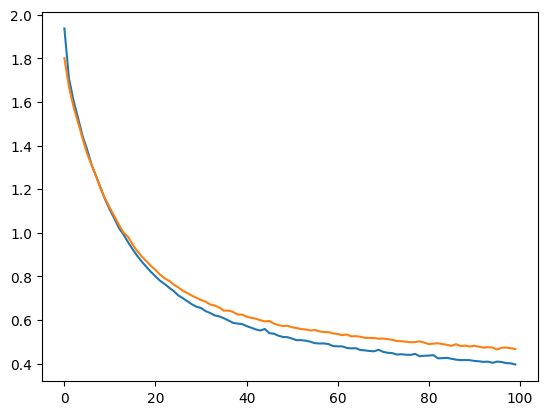

In [32]:
import matplotlib.pyplot as plt
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.show()

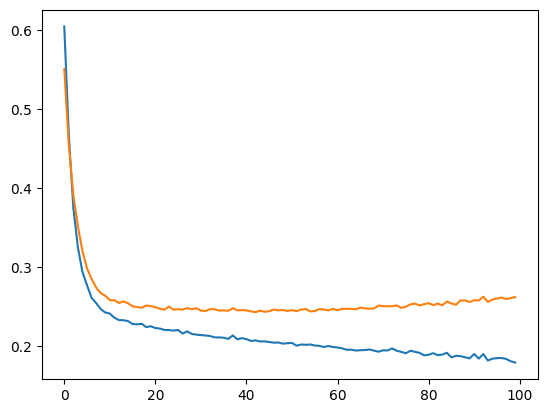

In [33]:
plt.plot(history_sc.history['loss'])
plt.plot(history_sc.history['val_loss'])
plt.show()